## Load necessary libraries

In [27]:
import os
import sys
import pandas as pd
import numpy as np

import collections

from datetime import date

from sklearn import tree, metrics
from math import sqrt
import graphviz
import pydotplus

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Image
from subprocess import call
import warnings
warnings.simplefilter('ignore')

## Load data

In [15]:
# Read data 
df = pd.read_csv("prepared_data.csv", parse_dates=['Erstzul.', 'EK-Dat.', 'VK-Dat.'])
df.head()

,Identifier,Hersteller,Typ,kW/PS,Erstzul.,KM,Hd.,EK-Dat.,EK-Preis,Rep.,VK-Dat.,VK-Preis,Tage
0,15,BMW,R 100,44/60,1990-05-30,84000,5,2018-07-02,3400,NaN,2018-07-05,3600,3
1,54,BMW,R 1100,57/78,1997-05-20,77400,5,2016-07-29,2100,NaN,2016-08-11,2200,13
2,42,BMW,R 1100,57/78,2000-12-14,96000,2,2018-03-06,2200,NaN,2018-03-15,2300,9
3,19,BMW,R 1150,70/95,2002-04-16,104000,1,2017-03-09,1500,NaN,2017-03-13,1500,4
4,18,BMW,R 1150,70/95,2003-05-14,74400,2,2018-09-24,2200,NaN,2018-09-28,2400,4


In [16]:
# Check data types
df.dtypes.reset_index(name="dtype")

,index,dtype
0,Identifier,int64
1,Hersteller,object
2,Typ,object
3,kW/PS,object
4,Erstzul.,datetime64[ns]
5,KM,int64
6,Hd.,int64
7,EK-Dat.,datetime64[ns]
8,EK-Preis,int64
9,Rep.,float64


## Goal: predict days on lot

### Remark: Decision trees perform best with numerical / boolean input variables

In [17]:
# First column is our target Variable
df = df [ ["Tage"] + list(df.columns[:-1]) ]

In [18]:
# Extract all integer columns for training
def getIntegerColumns(df):
    tmp = df.dtypes.reset_index(name="dtype")
    return list(tmp[ (tmp["dtype"]=="int64")]["index"])

['Tage', 'Identifier', 'KM', 'Hd.', 'EK-Preis', 'VK-Preis']
Root mean squared error:  0.0


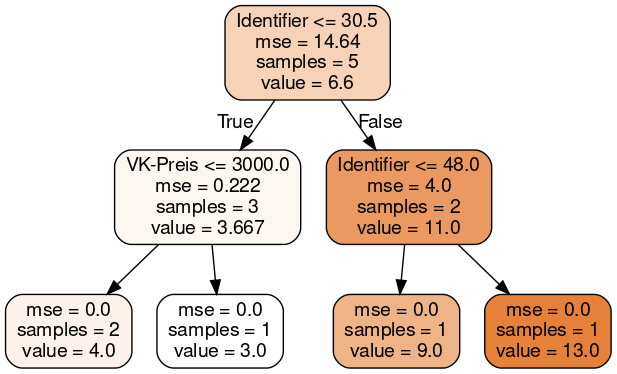

In [19]:
df_tree = df[getIntegerColumns(df)]
print(getIntegerColumns(df))

# 1. Train the decision tree
clf = tree.DecisionTreeRegressor().fit(df_tree.iloc[:,1:], df_tree.iloc[:,:1])

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,1:]))))

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree1.dot", 
                                     feature_names=df_tree.columns[1:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True) 

call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=100'])
Image(filename = 'tree1.png')

## Task: Analyse the tree. How reliable are the chosen decisions?

['Tage', 'Identifier', 'KM', 'Hd.', 'EK-Preis', 'VK-Preis']
Root mean squared error:  0.0


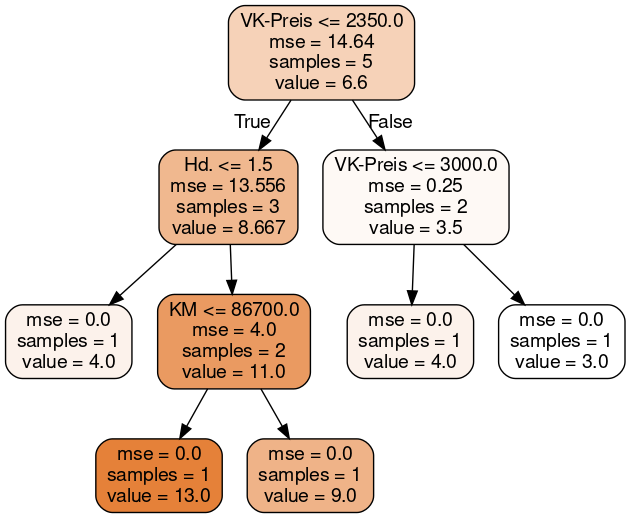

In [20]:
df_tree = df[getIntegerColumns(df)]
print(getIntegerColumns(df))

# 1. Train the decision tree --> exclude "Identifier"
clf = tree.DecisionTreeRegressor().fit(df_tree.iloc[:,2:], df_tree.iloc[:,:1])

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,2:]))))

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree2.dot", 
                                     feature_names=df_tree.columns[2:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True) 


call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=100'])
Image(filename = 'tree2.png')

## Task: Analyse the tree. Is the tree applicable for unknown data?

### check for tree parameters:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

['Tage', 'Identifier', 'KM', 'Hd.', 'EK-Preis', 'VK-Preis']
Root mean squared error:  0.0


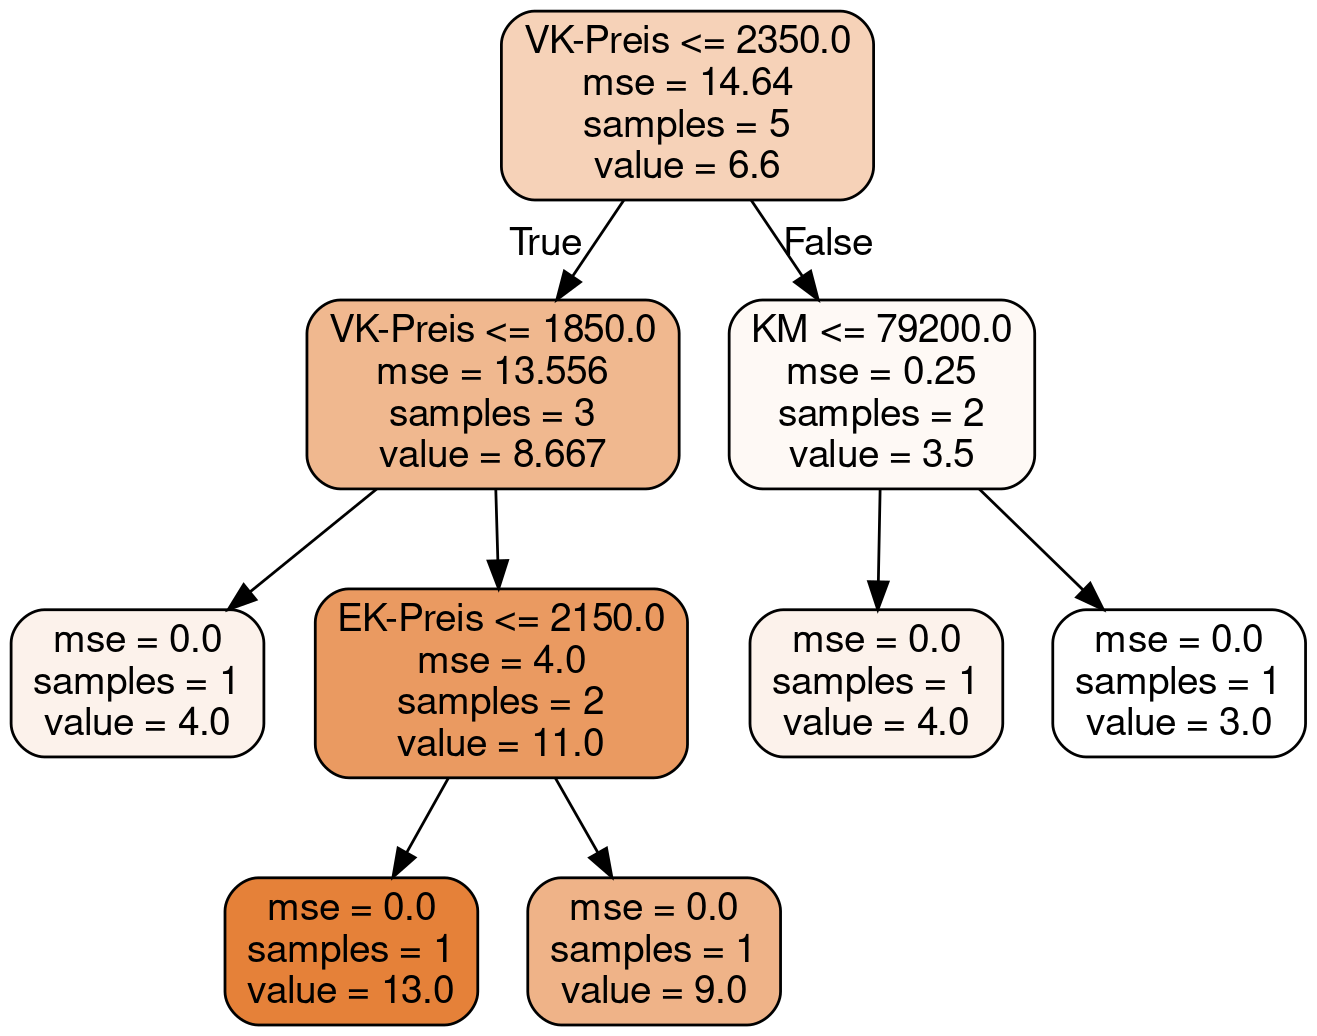

In [21]:
df_tree = df[getIntegerColumns(df)]
print(getIntegerColumns(df))

# 1. Train the decision tree --> adapt the number of decisions
clf = tree.DecisionTreeRegressor(max_depth=4).fit(df_tree.iloc[:,2:], df_tree.iloc[:,:1])

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree3.dot", 
                                     feature_names=df_tree.columns[2:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True) 

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,2:]))))

#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"12!"')
#graphviz.Source(pydot_graph.to_string())

call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=200'])
Image(filename = 'tree3.png')

In [22]:
def getIntegerAndFloatColumns(df):
    tmp = df.dtypes.reset_index(name="dtype")
    return list(  tmp[ (tmp["dtype"]=="int64") | (tmp["dtype"]=="float64") ]["index"]     )

['Tage', 'Identifier', 'KM', 'Hd.', 'EK-Preis', 'Rep.', 'VK-Preis']
Root mean squared error:  0.0


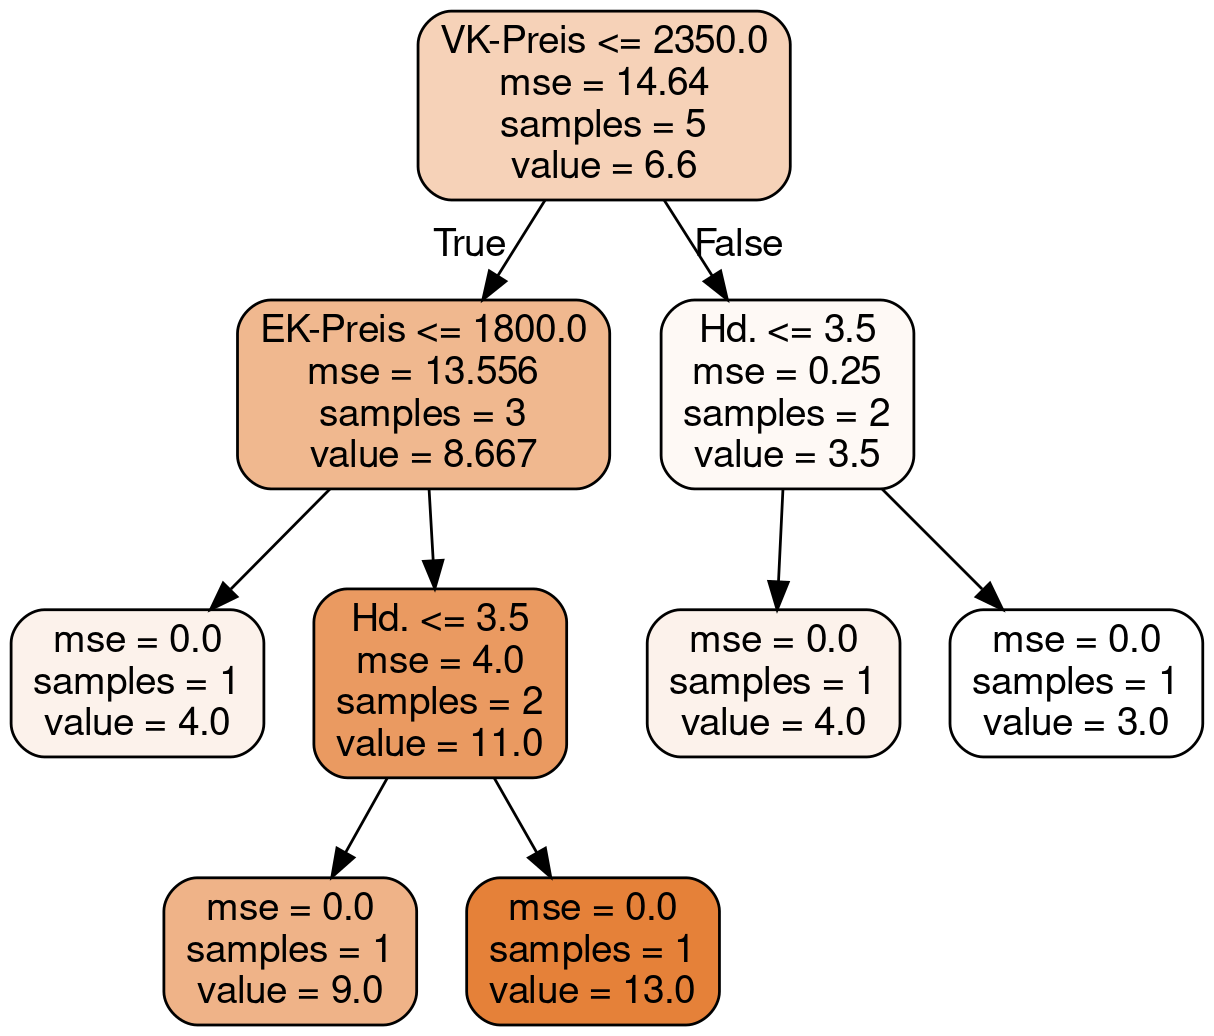

In [28]:
df_tree = df[getIntegerAndFloatColumns(df)]
df_tree["Rep."] = df_tree["Rep."].fillna(0)
print(getIntegerAndFloatColumns(df))

# 1. Train the decision tree
clf = tree.DecisionTreeRegressor(max_depth=4).fit(df_tree.iloc[:,2:], df_tree.iloc[:,:1])

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,2:]))))

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree4.dot", 
                                     feature_names=df_tree.columns[2:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True)


call(['dot', '-Tpng', 'tree4.dot', '-o', 'tree4.png', '-Gdpi=200'])
Image(filename = 'tree4.png')

## Task: Analyse the tree. Do you think the first decision is meaningful?

## Feature Engineering: Exploring the columns. What information can be computed based on column dates?

['Tage', 'Identifier', 'KM', 'Hd.', 'EK-Preis', 'Rep.', 'VK-Preis', 'Alter']
Root mean squared error:  0.0


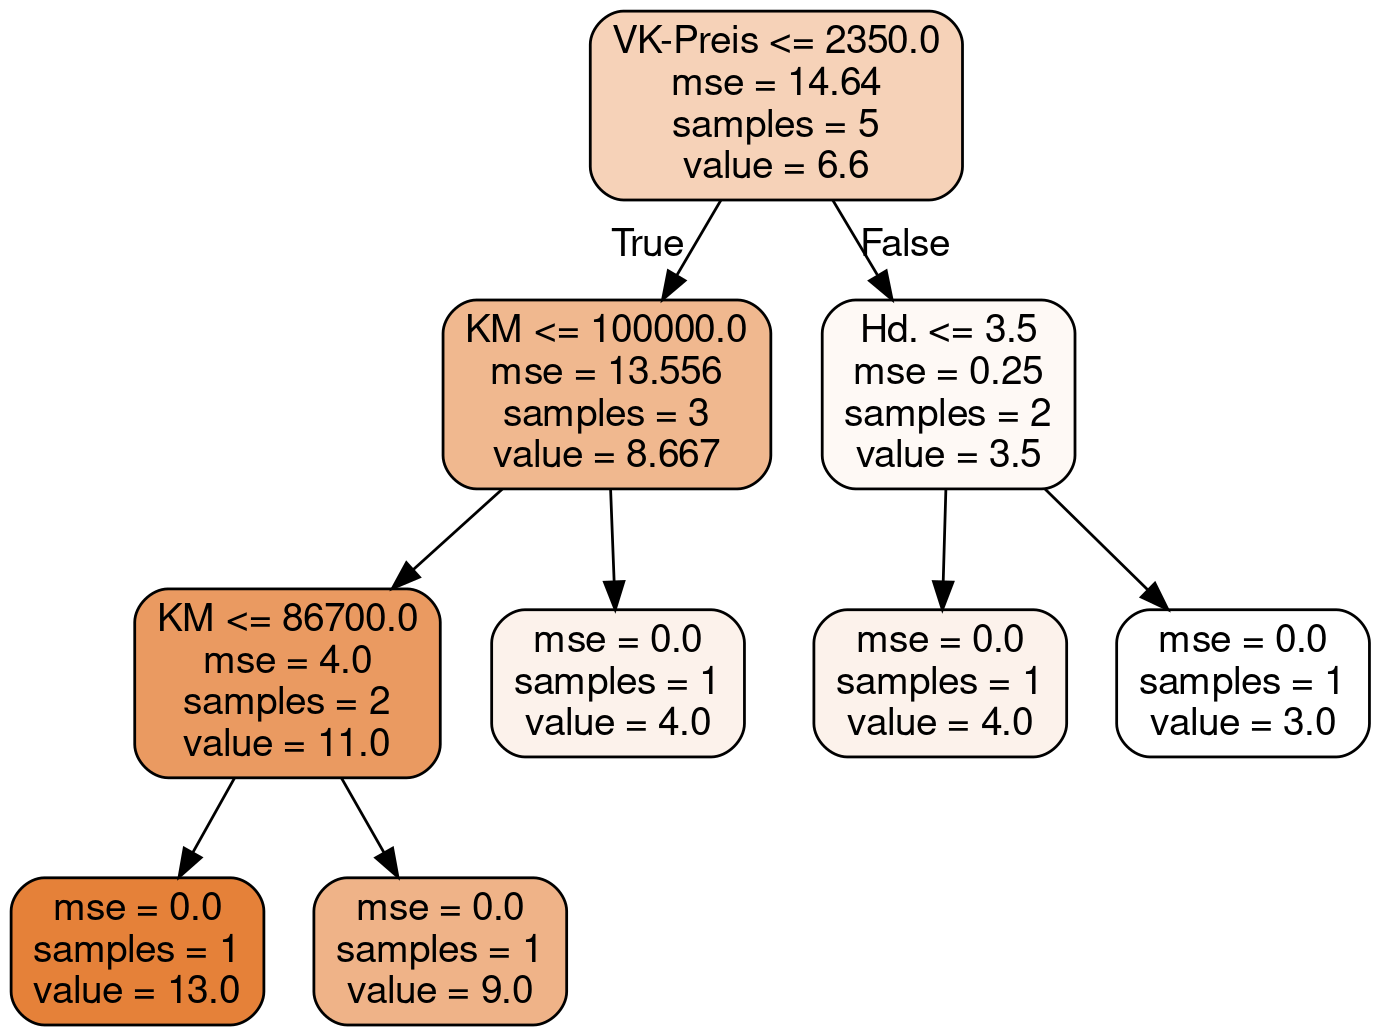

In [24]:
df_tree = df.copy()
df_tree["Alter"] = (df_tree["EK-Dat."]-df_tree["Erstzul."]).dt.days/30
df_tree = df_tree[getIntegerAndFloatColumns(df_tree)]
df_tree["Rep."] = df_tree["Rep."].fillna(0)
# Compute age in month
print(getIntegerAndFloatColumns(df_tree))


# 1. Train the decision tree
clf = tree.DecisionTreeRegressor(max_depth=4).fit(df_tree.iloc[:,2:], df_tree.iloc[:,:1])

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree5.dot", 
                                     feature_names=df_tree.columns[2:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True) 

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,2:]))))

call(['dot', '-Tpng', 'tree5.dot', '-o', 'tree5.png', '-Gdpi=200'])
Image(filename = 'tree5.png')

In [25]:
def getIntegerAndFloatAndStringColumns(df):
    tmp = df.dtypes.reset_index(name="dtype")
    return list(  tmp[ (tmp["dtype"]=="int64") | (tmp["dtype"]=="float64") | (tmp["dtype"]=="object") ]["index"]     )

['Tage', 'Identifier', 'Hersteller', 'Typ', 'kW/PS', 'KM', 'Hd.', 'EK-Preis', 'Rep.', 'VK-Preis', 'Alter']
Root mean squared error:  0.0


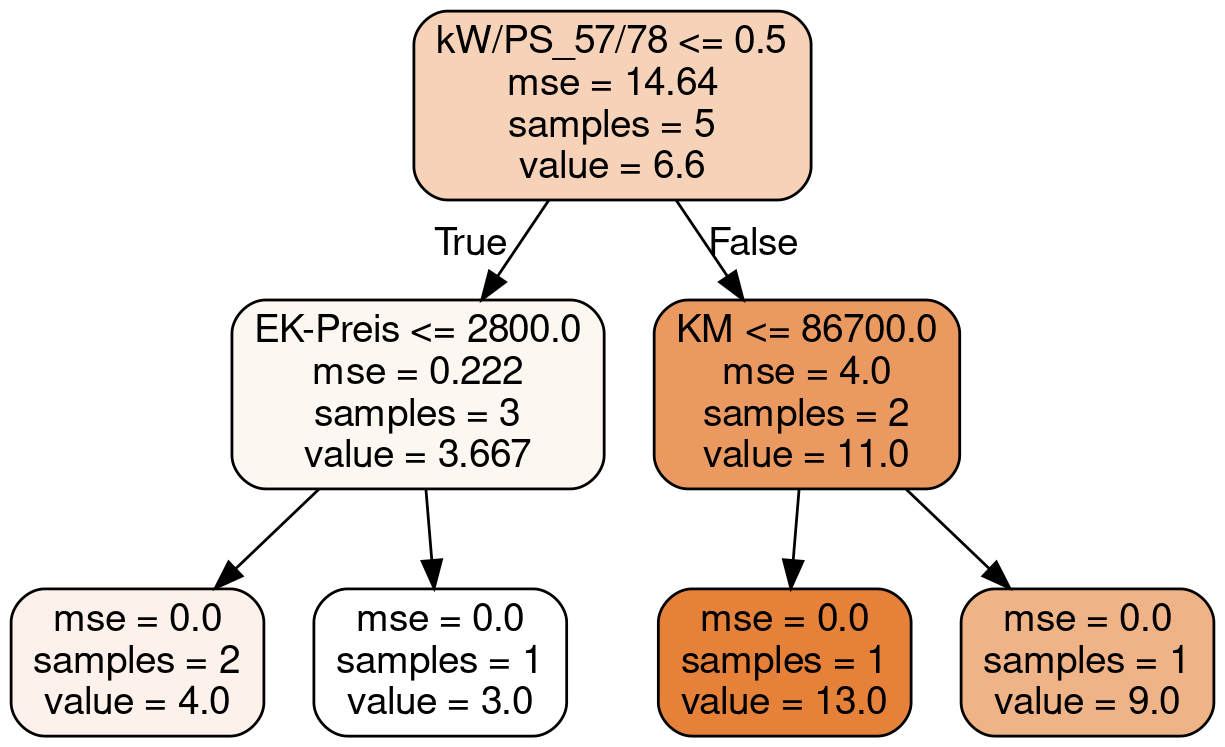

In [26]:
df_tree = df.copy()
df_tree["Alter"] = (df_tree["VK-Dat."]-df_tree["Erstzul."]).dt.days/30
df_tree = df_tree[getIntegerAndFloatAndStringColumns(df_tree)]
df_tree["Rep."] = df_tree["Rep."].fillna(0)
# Compute age in month
print(getIntegerAndFloatAndStringColumns(df_tree))

df_tree = pd.get_dummies(df_tree)

# 1. Train the decision tree
clf = tree.DecisionTreeRegressor(max_depth=4).fit(df_tree.iloc[:,2:], df_tree.iloc[:,:1])

# 3. Visualize the decision tree
graphviz.Source(tree.export_graphviz(clf, out_file=None) )

# And can be nicely visualized by setting some more parameters
dot_data = tree.export_graphviz(clf, out_file="tree6.dot", 
                                     feature_names=df_tree.columns[2:],
                                     class_names=df_tree[df_tree.columns[0]].unique(),
                                     filled=True, rounded=True) 

print ("Root mean squared error: ", sqrt(metrics.mean_squared_error(df_tree.iloc[:,:1], clf.predict(df_tree.iloc[:,2:]))))

call(['dot', '-Tpng', 'tree6.dot', '-o', 'tree6.png', '-Gdpi=200'])
Image(filename = 'tree6.png')

## Analyse the root mean squared error. Why is the performance worse although more information has been added?

## What else can be done to improve the results?